## 1. Download data

url: https://archive.ics.uci.edu/static/public/477/real+estate+valuation+data+set.zip

## 2. Import library and read data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('data/Real estate valuation data set.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


## Data Exploration

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [3]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
df.isnull().sum() # check missing value

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Visualize

In [5]:
import os
def savefig(figure, filename):
    if not os.path.exists('images'):
        os.makedirs('images')
    filename = f'images/{filename}'
    figure.savefig(filename)

/tmp/ipykernel_43993/2594224625.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins = 50, figsize=(18, 10), ax = ax)


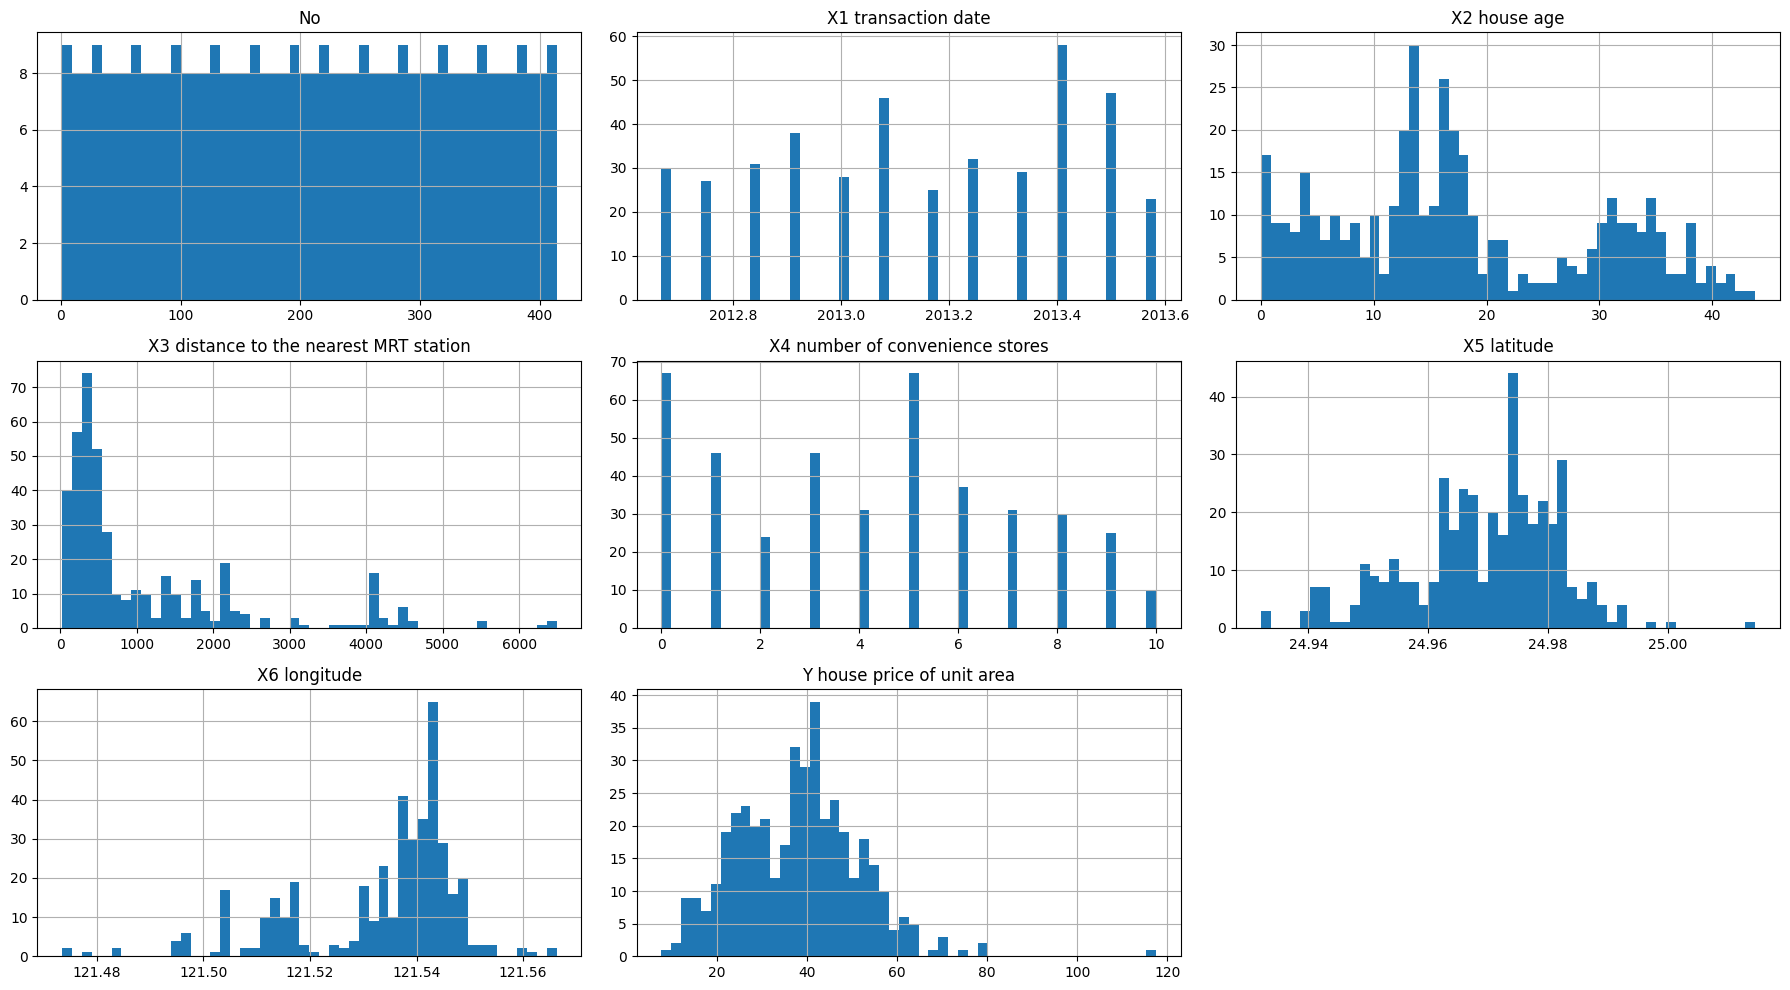

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 10))
df.hist(bins = 50, figsize=(18, 10), ax = ax)
savefig(fig, 'histograms.png')
plt.tight_layout()
plt.show()

In [7]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

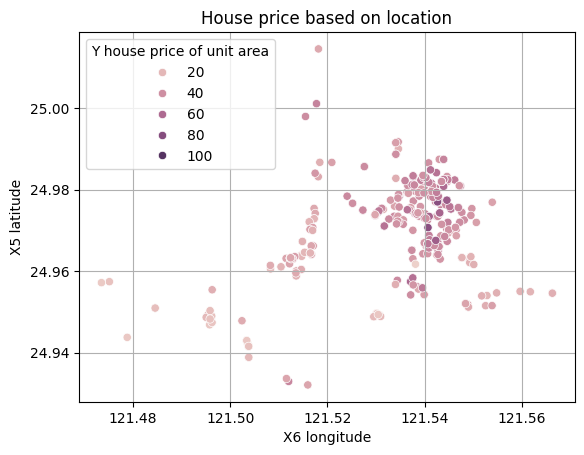

In [8]:
import seaborn as sns
sns.scatterplot(data = df, x = 'X6 longitude', y = 'X5 latitude', hue = 'Y house price of unit area')
plt.title('House price based on location')
savefig(plt, 'House price based on location.png')
plt.grid(True)
plt.show()

In [9]:
# drop outliers
df = df[df['X5 latitude'] <= 25]

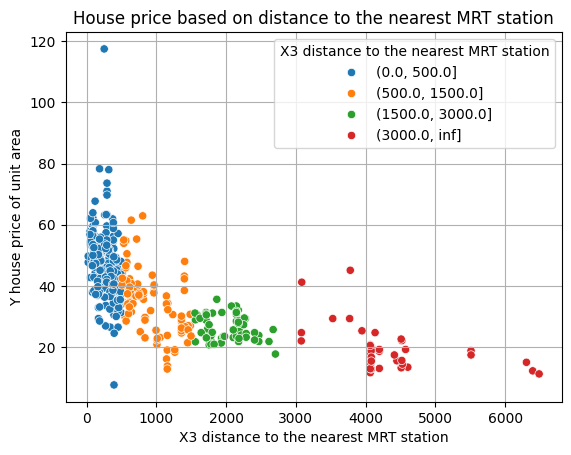

In [10]:
bins = [0, 500, 1500, 3000, np.infty]
sns.scatterplot(
    data=df,
    x="X3 distance to the nearest MRT station",
    y="Y house price of unit area",
    hue=pd.cut(df['X3 distance to the nearest MRT station'], bins=bins)
)
plt.title('House price based on distance to the nearest MRT station')
plt.grid(True)
savefig(plt, 'House price based on distance to the nearest MRT station.png')
plt.show()

In [11]:
# drop outliers
df = df[df['Y house price of unit area'] <= 110]

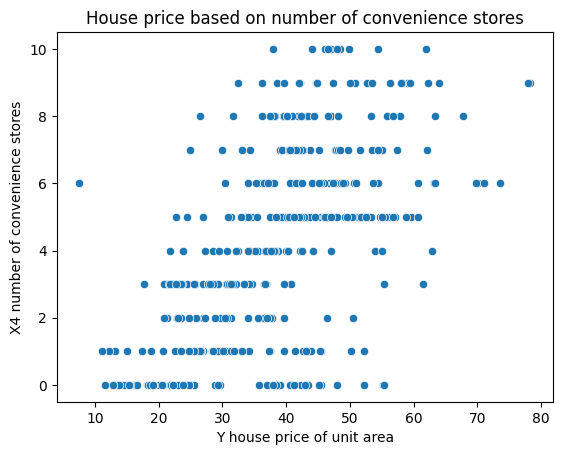

In [12]:
sns.scatterplot(data=df, y='X4 number of convenience stores', x='Y house price of unit area')
plt.title('House price based on number of convenience stores')
savefig(plt, 'House price based on number of convenience stores.png')
plt.show()

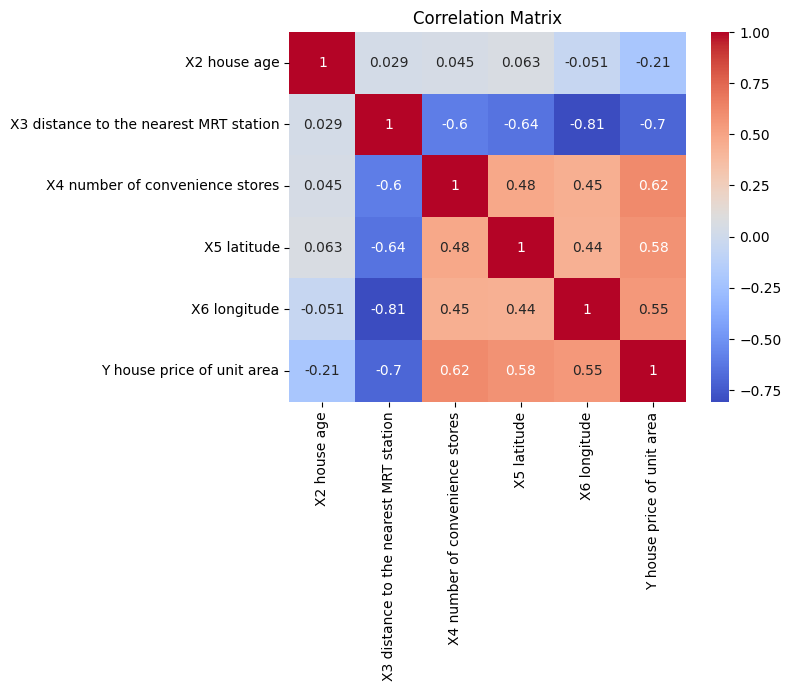

In [13]:
# make corr matrix
corr_matrix = df.corr()
# plot corr matrix
# remove attributes: "No", "X1 transaction date"
corr_matrix = df.drop(['No', 'X1 transaction date'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
savefig(plt, 'correlation_matrix.png')
plt.show()

## Data Preprocessing And Feature Engineer

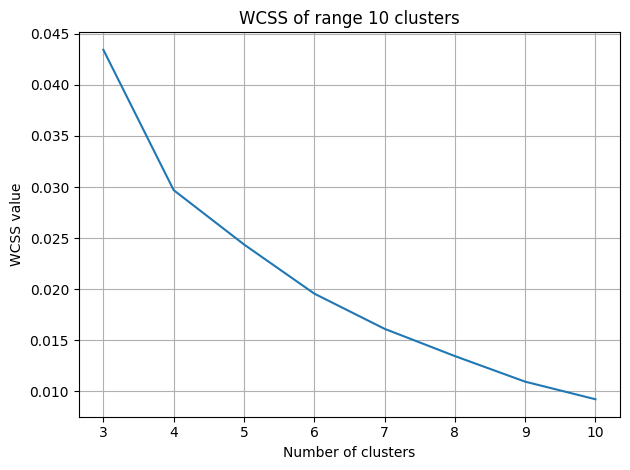

In [14]:
# clustering location
from sklearn.cluster import KMeans

wcss = []
for K in range(3,11):
    kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df[['X6 longitude', 'X5 latitude']])
    wcss.append(kmeans.inertia_)

# plot WCSS
plt.plot(range(3, 11), wcss)
plt.title('WCSS of range 10 clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS value')
plt.grid(True)
plt.tight_layout()
savefig(plt, 'WCSS.png')
plt.show()

Chọn 4 là K clusters

In [15]:
K = 4

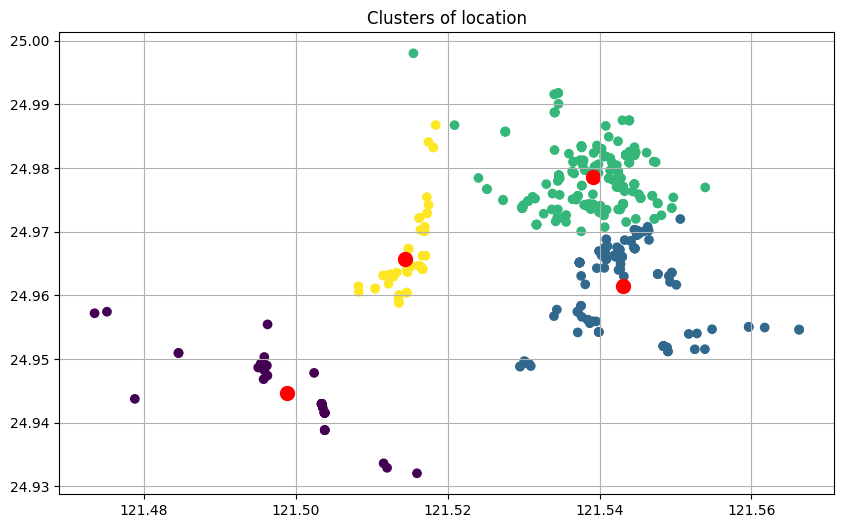

In [16]:
kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42)
kmeans.fit(df[['X6 longitude', 'X5 latitude']])
clusters = kmeans.cluster_centers_
# plot clusters
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.scatter(df['X6 longitude'], df['X5 latitude'], c=kmeans.labels_)
plt.scatter(clusters[:, 0], clusters[:, 1], s=100, c='red')
plt.title('Clusters of location')
savefig(plt, 'clusters.png')
plt.show()

In [17]:
print(clusters) # make sure the cluster is ascending

[[121.49886194  24.94463833]
 [121.54312612  24.96150033]
 [121.53909387  24.97850317]
 [121.51432982  24.965772  ]]


In [18]:
# add clusters to df
df['clusters'] = kmeans.labels_

In [19]:
# make a new feature of distance to the nearest MRT station
df['distance_cat'] = pd.cut(df['X3 distance to the nearest MRT station'], bins=bins, labels=['closest', 'a_bit_close', 'far', 'very_far'])

In [20]:
# Select features
num_features = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']
cat_features = ['clusters', 'distance_cat']

X = df[num_features + cat_features].values
y = df['Y house price of unit area'].values

In [21]:
X

array([[32.0, 84.87882, 10, 2, 'closest'],
       [19.5, 306.5947, 9, 2, 'closest'],
       [13.3, 561.9845, 5, 2, 'a_bit_close'],
       ...,
       [18.8, 390.9696, 7, 2, 'closest'],
       [8.1, 104.8101, 5, 1, 'closest'],
       [6.5, 90.45606, 9, 2, 'closest']], dtype=object)

In [22]:
# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-2, -1])], remainder='passthrough')
X_transformed = ct.fit_transform(X)

In [23]:
X_transformed[:4]

array([[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 32.0, 84.87882, 10],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 19.5, 306.5947, 9],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 13.3, 561.9845, 5],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 13.3, 561.9845, 5]],
      dtype=object)

In [24]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
print(f'Train size: {len(X_train)}')
print(f'Test size: {len(X_test)}')

Train size: 328
Test size: 83


In [25]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, K + 4:] = sc.fit_transform(X_train[:, K + 4:])
X_test[:, K + 4:] = sc.transform(X_test[:, K + 4:])

In [26]:
X_train[:4]

array([[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.8888013835232703,
        -0.444018689377152, 0.33068118951029024],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -0.1135577973349826,
        2.001183305654181, -1.3909605590512215],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, -1.1070465429644014,
        0.40341191581572583, -0.3579755099143145],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, -1.4618639521177652,
        -0.7048290209597755, 0.6750095392225925]], dtype=object)

In [27]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,clusters,distance_cat
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,2,closest
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,2,closest
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,2,a_bit_close
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,2,a_bit_close
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,2,closest


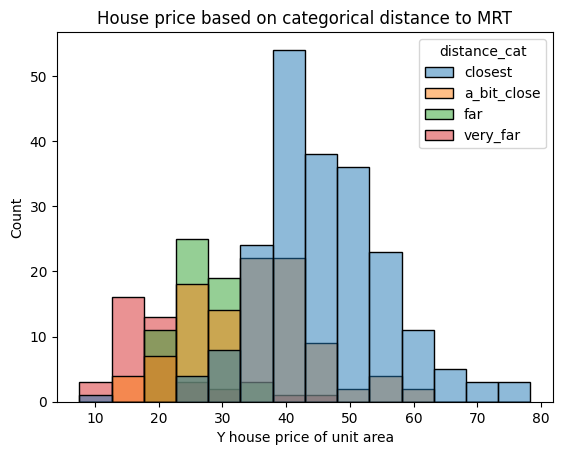

In [28]:
sns.histplot(data=df, hue='distance_cat', x='Y house price of unit area')
plt.title('House price based on categorical distance to MRT')
savefig(plt, 'House price based on categorical distance to MRT.png')
plt.show()

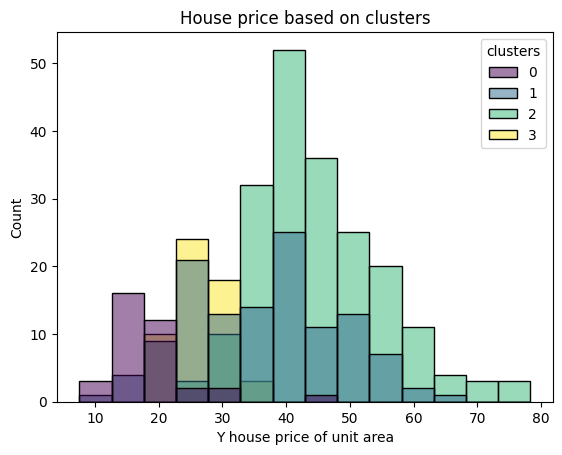

In [29]:
sns.histplot(data=df, hue='clusters', x='Y house price of unit area', palette='viridis')
plt.title('House price based on clusters')
savefig(plt, 'House price based on clusters.png')
plt.show()

## Train a Regression model

In [30]:
(X_train.shape, y_train.shape)

((328, 11), (328,))

In [31]:
(X_test.shape, y_test.shape)

((83, 11), (83,))

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(random_state=42),
    SVR()
]

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def generate_baseline_results(models, X, y, metrics, cv = 5, plot_results = False):
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = -cross_val_score(model, X, y, scoring=metrics, cv=5)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    cv_results = pd.DataFrame(entries, columns=['model_name', 'fold_idx', metrics])
    if plot_results:
        sns.boxplot(data=cv_results, x='model_name', y=metrics, showmeans = True)
        plt.title("Boxplot of models")
        plt.grid(True)
        plt.tight_layout()
        plt.xticks(rotation=45)
        savefig(plt, 'boxplot.png')
        plt.show()
    mean = cv_results.groupby('model_name')[metrics].mean()
    std = cv_results.groupby('model_name')[metrics].std()

    baseline_results = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_results.columns = ['Mean of RMSE', 'Standard Deviation']

    # sort by mean
    baseline_results.sort_values(by = ['Mean of RMSE'], ascending=True, inplace = True)
    return baseline_results

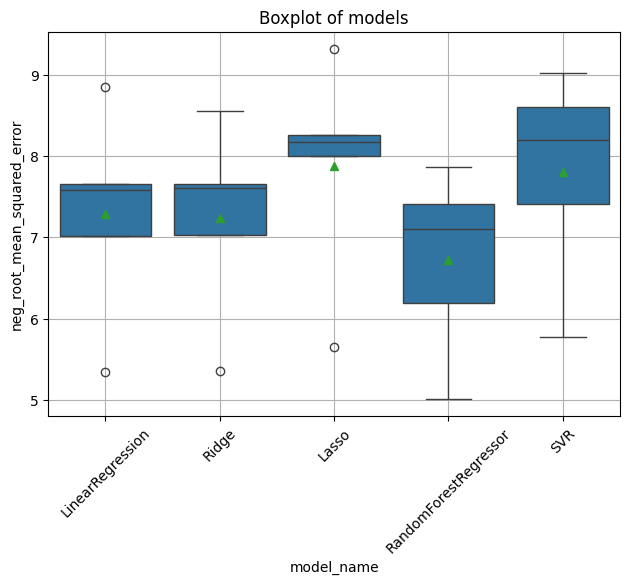

,Mean of RMSE,Standard Deviation
model_name,,
RandomForestRegressor,6.720395,1.132809
Ridge,7.240322,1.188474
LinearRegression,7.293674,1.278845
SVR,7.802013,1.277895
Lasso,7.880894,1.349817


In [34]:
generate_baseline_results(models, X_train, y_train, cv = 5, metrics = 'neg_root_mean_squared_error', plot_results=True)

## Fine Tuning

Model RandomForest Regressor is chosen for fine tunning

In [35]:
# Using grid search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring = 'neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total tim

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [36]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 400}

## Evaluate Model on the Test set

In [37]:
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)

In [38]:
final_rmse = mean_squared_error(y_test, y_pred)
print(final_rmse)

42.91898488782731
